In [153]:
import pandas as pd
import numpy as np
import itertools
from IPython.core.display import Image 

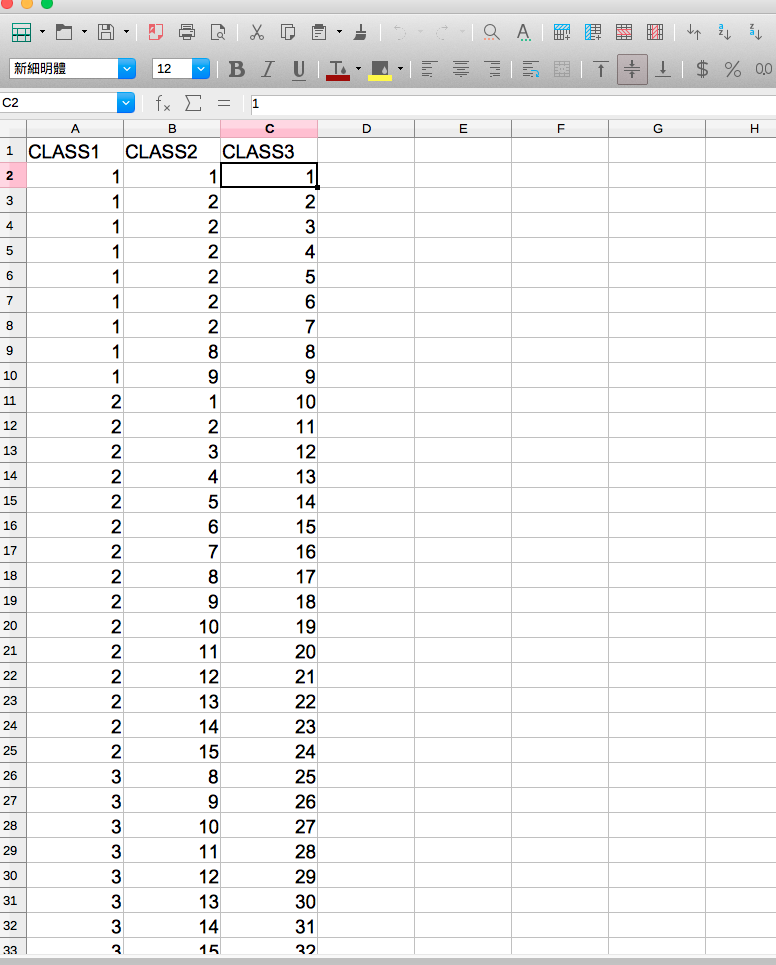

In [157]:
Image(filename='original.png')

In [142]:
df = pd.read_excel('PYTHON.xlsx', sheets_name="工作表1")

In [143]:
df

,CLASS1,CLASS2,CLASS3
0,1,1,1
1,1,2,2
2,1,2,3
3,1,2,4
4,1,2,5
5,1,2,6
6,1,2,7
7,1,8,8
8,1,9,9
9,2,1,10


In [144]:
pd.set_option('display.max_columns', 100) # display more columns

In [145]:
# drop duplicates for each class
df.CLASS1 = df.CLASS1.drop_duplicates() 
df.CLASS2 = df.CLASS2.drop_duplicates()
df.CLASS3 = df.CLASS3.drop_duplicates()

In [146]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
CLASS1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CLASS2,1.0,2.0,NaN,NaN,NaN,NaN,NaN,8.0,9.0,NaN,NaN,3.0,4.0,5.0,6.0,7.0,NaN,NaN,10.0,11.0,12.0,13.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
CLASS3,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0


In [147]:
writer = pd.ExcelWriter('new_PYTHON.xlsx', engine='xlsxwriter')
df.T.to_excel(writer, sheet_name='result')

In [148]:
workbook = writer.book
worksheet = writer.sheets['result'] 
merge_format = workbook.add_format({'align': 'center'}) # align text to center


def findrange(series):
    # return the index of element which is not None
    indexes = []
    for index, value in series.iteritems():
        if pd.notnull(value):
            indexes.append(index)
    indexes.append(len(series)) # append the last index number
    return indexes

def pairwise(iterable):
    """
    return list of tuple of (start, end) index for cell merge from list
    s -> (s0,s1), (s1,s2), (s2, s3), ...
    """
    a, b = itertools.tee(iterable)
    next(b, None)
    return zip(a, b)

# find the merge rule for CLASS1
class1 = df.CLASS1
indexes_1 = findrange(class1)
a = pairwise(indexes_1)
# merge cell on CLASS1
for start, end in a:
    worksheet.merge_range(1, start + 1, 1, end, class1[start], merge_format)


# find the merge rule for CLASS3
class2 = df.CLASS2
indexes_2 = findrange(class2)
b = pairwise(indexes_2)
# merge cell on CLASS3
for start, end in b:
    worksheet.merge_range(2, start + 1, 2, end, class2[start], merge_format)
    


# find the merge rule for CLASS3
class3 = df.CLASS3
indexes_3 = findrange(class3)
c = pairwise(indexes_3)
# merge cell on CLASS3
for start, end in c:
    worksheet.merge_range(3, start + 1, 3, end, class3[start], merge_format)  



/opt/conda/lib/python3.5/site-packages/xlsxwriter/worksheet.py:1443: UserWarning: Can't merge single cell
  warn("Can't merge single cell")


In [150]:
writer.save()

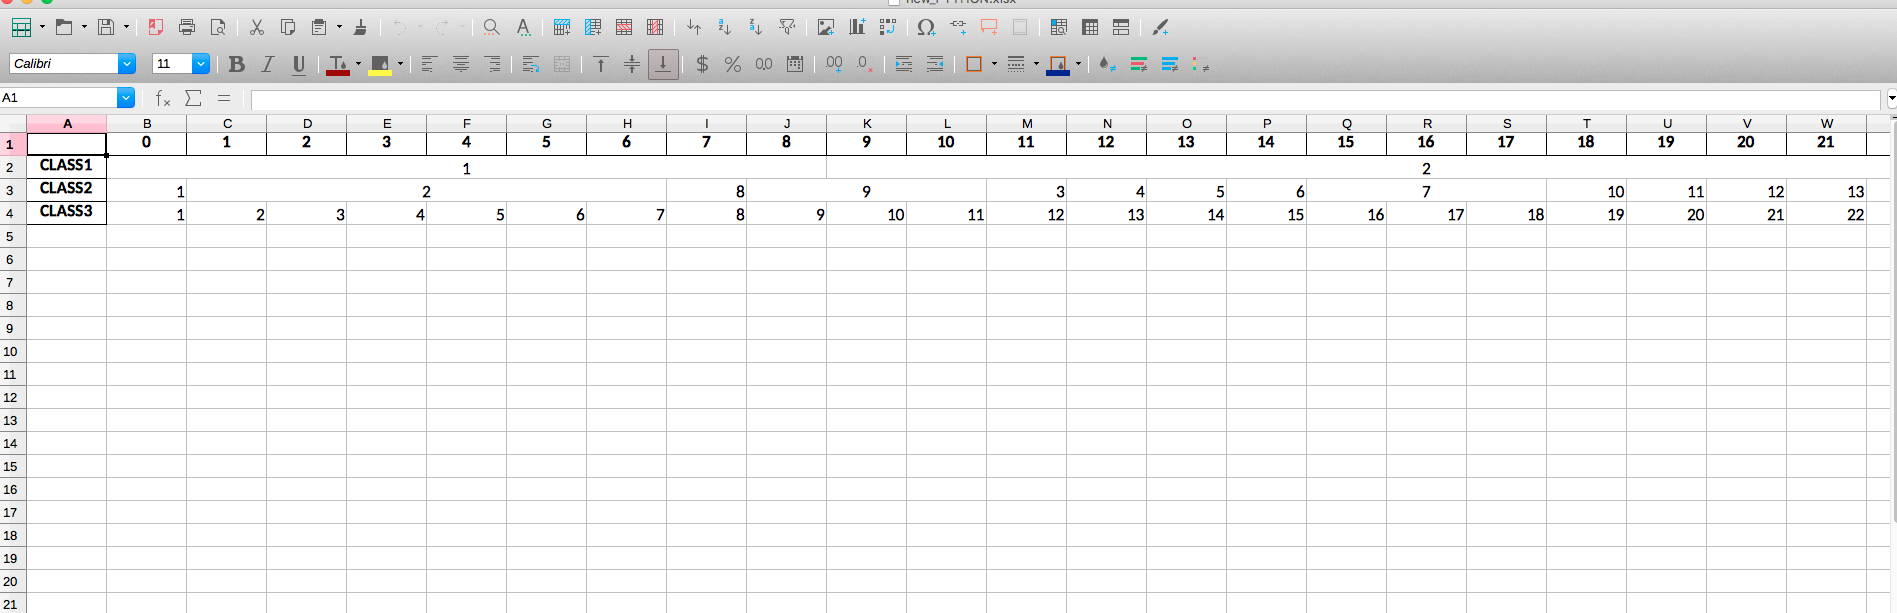

In [159]:
Image(filename='result.png')